# Ivan's E-Commerce Exploratory NoteBook

#####
Data Importing and Pre-processing
- Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used
- Clean, wrangle, and handle missing data
- Transform data appropriately using techniques such as aggregation, normalization, and feature construction
- Reduce redundant data and perform need based discretization

Data Analysis and Visualization
- Identify categorical, ordinal, and numerical variables within data
- Provide measures of centrality and distribution with visualizations
- Diagnose for correlations between variables and determine independent and dependent variables
- Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest

Data Analytics
- Determine the need for a supervised or unsupervised learning method and identify dependent and independent variables
- Train, test, and provide accuracy and evaluation metrics for model results

Presentation
- In a 5 to 10 minutes video, briefly explain the project workflow from the code and results in your markdown notebook
State your findings from the data and provide the interpretation of results from your analysis at each stage in the project

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#### Importing CSV Dataset from E-Commerce

In [2]:
#Set File Path & import csv
datasetFP = '../data/Dataset 3 (Online Shoppers Intention)/online_shoppers_intention.csv'
eCommerceDF = pd.read_csv(datasetFP) 

In [3]:
eCommerceDF.corr()['Revenue']

Administrative             0.138917
Administrative_Duration    0.093587
Informational              0.094514
Informational_Duration     0.070345
ProductRelated             0.158538
ProductRelated_Duration    0.152373
BounceRates               -0.150673
ExitRates                 -0.207071
PageValues                 0.492422
SpecialDay                -0.082305
OperatingSystems          -0.014012
Browser                    0.023984
Region                    -0.011595
TrafficType               -0.005113
Weekend                    0.029295
Revenue                    1.000000
Name: Revenue, dtype: float64

In [4]:
eCommerceDF.shape

(12330, 18)

In [5]:
eCommerceDF = eCommerceDF.drop_duplicates()

In [6]:
eCommerceDF.shape

(12209, 18)

In [7]:
eCommerceDF.corr()['PageValues']

Administrative             0.097046
Administrative_Duration    0.066194
Informational              0.046876
Informational_Duration     0.029604
ProductRelated             0.054853
ProductRelated_Duration    0.051065
BounceRates               -0.115647
ExitRates                 -0.173741
PageValues                 1.000000
SpecialDay                -0.066521
OperatingSystems           0.019467
Browser                    0.045626
Region                     0.010353
TrafficType                0.013237
Weekend                    0.010763
Revenue                    0.491760
Name: PageValues, dtype: float64

In [8]:
eCommerceDF.loc[eCommerceDF['PageValues'].isnull()&eCommerceDF['Revenue'].notnull()&eCommerceDF['Revenue'].eq(False),'PageValues'] = 0

In [9]:
eCommerceDF.loc[eCommerceDF['PageValues']!=0&eCommerceDF['Revenue'].eq(False),'Revenue'] = True

In [10]:
eCommerceDF.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.600493,0.373009,0.254846,0.428396,0.371237,-0.213442,-0.311419,0.097417,-0.096870,-0.005337,-0.025537,-0.007078,-0.034520,0.023949,0.341764
Administrative_Duration,0.600493,1.000000,0.301845,0.237237,0.286935,0.353643,-0.137153,-0.202092,0.066621,-0.074615,-0.006583,-0.015687,-0.006609,-0.014911,0.013342,0.215851
Informational,0.373009,0.301845,1.000000,0.618599,0.371334,0.384959,-0.108863,-0.158998,0.047088,-0.049473,-0.008812,-0.037830,-0.029978,-0.034458,0.032945,0.219442
Informational_Duration,0.254846,0.237237,0.618599,1.000000,0.279114,0.346621,-0.070017,-0.102930,0.029931,-0.031236,-0.010230,-0.019543,-0.027824,-0.025083,0.023237,0.157555
ProductRelated,0.428396,0.286935,0.371334,0.279114,1.000000,0.860349,-0.193276,-0.286290,0.054859,-0.025766,0.004743,-0.013504,-0.039920,-0.044099,0.013602,0.306388
ProductRelated_Duration,0.371237,0.353643,0.384959,0.346621,0.860349,1.000000,-0.174186,-0.245483,0.051277,-0.038055,0.003867,-0.007650,-0.034700,-0.037279,0.005016,0.282378
BounceRates,-0.213442,-0.137153,-0.108863,-0.070017,-0.193276,-0.174186,1.000000,0.902538,-0.115421,0.087994,0.025934,-0.015922,0.001752,0.088280,-0.035434,-0.184240
ExitRates,-0.311419,-0.202092,-0.158998,-0.102930,-0.286290,-0.245483,0.902538,1.000000,-0.173206,0.116600,0.015798,-0.003716,-0.001874,0.086725,-0.053577,-0.262224
PageValues,0.097417,0.066621,0.047088,0.029931,0.054859,0.051277,-0.115421,-0.173206,1.000000,-0.066073,0.019594,0.046020,0.010350,0.012953,0.010434,0.546952
SpecialDay,-0.096870,-0.074615,-0.049473,-0.031236,-0.025766,-0.038055,0.087994,0.116600,-0.066073,1.000000,0.013518,0.003564,-0.016367,0.052905,-0.017666,-0.084733


In [11]:
eCommerceDF = eCommerceDF.drop('OperatingSystems',1)

In [12]:
eCommerceDF.isnull().sum()

Administrative               0
Administrative_Duration      0
Informational              128
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                  21
SpecialDay                   0
Month                        0
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

In [13]:
eCommerceDF.loc[eCommerceDF['Informational'].isnull()&eCommerceDF['Informational_Duration'].notnull()&eCommerceDF['Informational_Duration'].eq(0),'Informational'] = 0

In [14]:
eCommerceDF.isnull().sum()

Administrative              0
Administrative_Duration     0
Informational              24
Informational_Duration      0
ProductRelated              0
ProductRelated_Duration     0
BounceRates                 0
ExitRates                   0
PageValues                 21
SpecialDay                  0
Month                       0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [15]:
eCommerceDF.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.600493,0.372685,0.254846,0.428396,0.371237,-0.213442,-0.311419,0.097417,-0.096870,-0.025537,-0.007078,-0.034520,0.023949,0.341764
Administrative_Duration,0.600493,1.000000,0.300934,0.237237,0.286935,0.353643,-0.137153,-0.202092,0.066621,-0.074615,-0.015687,-0.006609,-0.014911,0.013342,0.215851
Informational,0.372685,0.300934,1.000000,0.618857,0.370676,0.384694,-0.108687,-0.158682,0.047486,-0.049552,-0.037839,-0.030285,-0.034303,0.032729,0.219770
Informational_Duration,0.254846,0.237237,0.618857,1.000000,0.279114,0.346621,-0.070017,-0.102930,0.029931,-0.031236,-0.019543,-0.027824,-0.025083,0.023237,0.157555
ProductRelated,0.428396,0.286935,0.370676,0.279114,1.000000,0.860349,-0.193276,-0.286290,0.054859,-0.025766,-0.013504,-0.039920,-0.044099,0.013602,0.306388
ProductRelated_Duration,0.371237,0.353643,0.384694,0.346621,0.860349,1.000000,-0.174186,-0.245483,0.051277,-0.038055,-0.007650,-0.034700,-0.037279,0.005016,0.282378
BounceRates,-0.213442,-0.137153,-0.108687,-0.070017,-0.193276,-0.174186,1.000000,0.902538,-0.115421,0.087994,-0.015922,0.001752,0.088280,-0.035434,-0.184240
ExitRates,-0.311419,-0.202092,-0.158682,-0.102930,-0.286290,-0.245483,0.902538,1.000000,-0.173206,0.116600,-0.003716,-0.001874,0.086725,-0.053577,-0.262224
PageValues,0.097417,0.066621,0.047486,0.029931,0.054859,0.051277,-0.115421,-0.173206,1.000000,-0.066073,0.046020,0.010350,0.012953,0.010434,0.546952
SpecialDay,-0.096870,-0.074615,-0.049552,-0.031236,-0.025766,-0.038055,0.087994,0.116600,-0.066073,1.000000,0.003564,-0.016367,0.052905,-0.017666,-0.084733


In [16]:
eCommerceDF.shape[0]

12209

In [17]:
eCommerceDF = eCommerceDF.dropna()

In [18]:
eCommerceDF.shape[0] 

12164

In [19]:
# eCommerceDF['logarithm_base2'] = np.log2(eCommerceDF['ProductRelated'])
# eCommerceDF['logarithm_base2'].hist()

In [20]:
eCommerceDF.dtypes

Administrative               int64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [21]:
eCommerceDF['Informational'] = eCommerceDF['Informational'].astype('int64')

In [22]:
eCommerceDF.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.599941,0.371767,0.251115,0.425811,0.368955,-0.213633,-0.311653,0.098142,-0.096774,-0.024465,-0.007305,-0.034024,0.024161,0.339887
Administrative_Duration,0.599941,1.000000,0.301418,0.237039,0.286952,0.354772,-0.137057,-0.201879,0.066279,-0.074340,-0.014911,-0.005991,-0.014374,0.013656,0.214997
Informational,0.371767,0.301418,1.000000,0.619476,0.368189,0.382606,-0.108619,-0.158440,0.047486,-0.048865,-0.037166,-0.030043,-0.033544,0.032642,0.218070
Informational_Duration,0.251115,0.237039,0.619476,1.000000,0.276699,0.344812,-0.069535,-0.102118,0.029901,-0.031374,-0.018803,-0.027117,-0.024760,0.023232,0.154887
ProductRelated,0.425811,0.286952,0.368189,0.276699,1.000000,0.859193,-0.193574,-0.286649,0.055084,-0.024782,-0.013225,-0.040153,-0.043427,0.012834,0.304676
ProductRelated_Duration,0.368955,0.354772,0.382606,0.344812,0.859193,1.000000,-0.174373,-0.245666,0.051377,-0.037093,-0.007564,-0.034628,-0.036419,0.003804,0.280170
BounceRates,-0.213633,-0.137057,-0.108619,-0.069535,-0.193574,-0.174373,1.000000,0.902557,-0.115401,0.088561,-0.015950,0.002125,0.087992,-0.035342,-0.183446
ExitRates,-0.311653,-0.201879,-0.158440,-0.102118,-0.286649,-0.245666,0.902557,1.000000,-0.173213,0.117187,-0.003740,-0.001554,0.086280,-0.053402,-0.261418
PageValues,0.098142,0.066279,0.047486,0.029901,0.055084,0.051377,-0.115401,-0.173213,1.000000,-0.066031,0.046054,0.010414,0.013077,0.010032,0.547590
SpecialDay,-0.096774,-0.074340,-0.048865,-0.031374,-0.024782,-0.037093,0.088561,0.117187,-0.066031,1.000000,0.003754,-0.017436,0.053082,-0.018705,-0.086016


In [23]:
eCommerceDF = eCommerceDF.drop(columns=['Browser','Region','TrafficType'])

In [24]:
eCommerceDF.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

<AxesSubplot:xlabel='Revenue', ylabel='ProductRelated'>

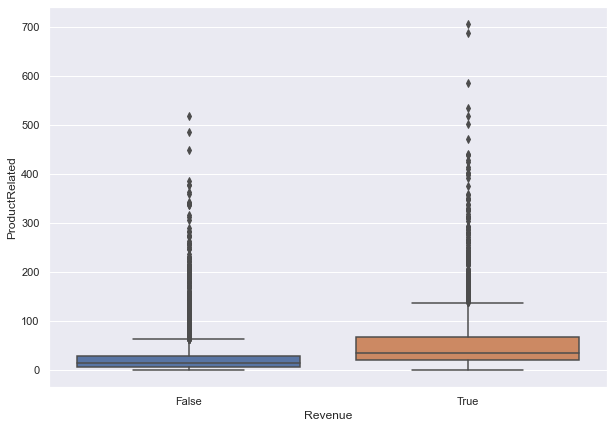

In [25]:
sns.set(rc={'figure.figsize':(10,7)})
sns.boxplot(x="Revenue", y="ProductRelated", data=eCommerceDF.dropna())

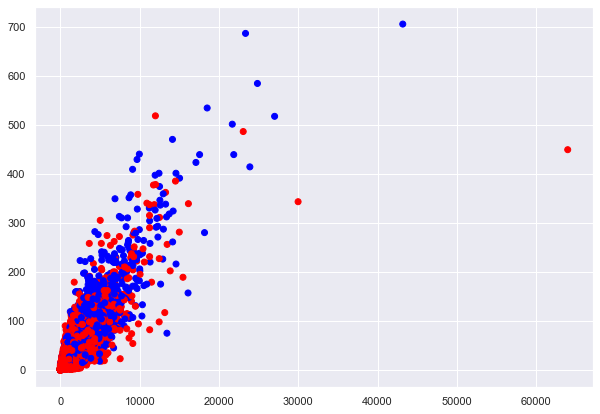

In [26]:
colors = {True : 'blue', False:'red'}
plt.scatter(eCommerceDF['ProductRelated_Duration'],eCommerceDF['ProductRelated'], c =  eCommerceDF['Revenue'].map(colors))

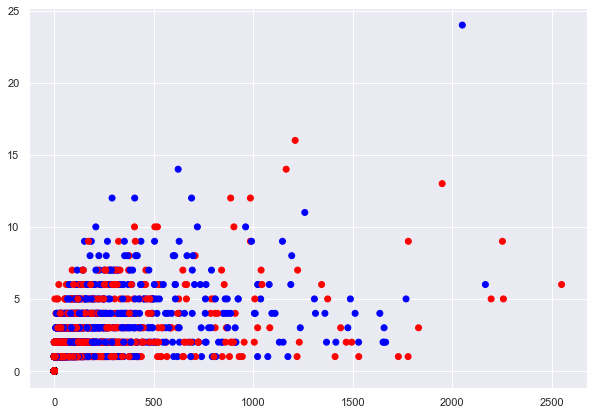

In [27]:
colors = {True : 'blue', False:'red'}
plt.scatter(eCommerceDF['Informational_Duration'],eCommerceDF['Informational'], c =  eCommerceDF['Revenue'].map(colors))

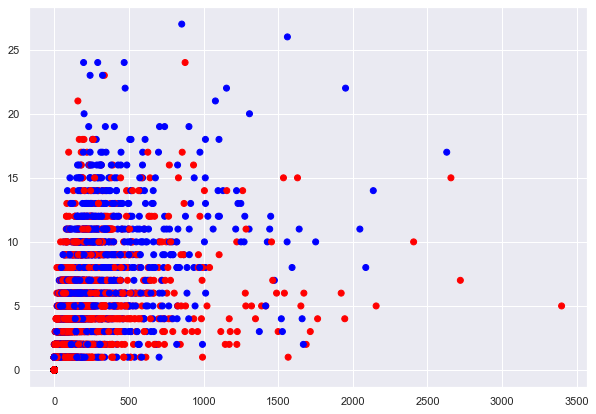

In [28]:
colors = {True : 'blue', False:'red'}
plt.scatter(eCommerceDF['Administrative_Duration'],eCommerceDF['Administrative'], c =  eCommerceDF['Revenue'].map(colors))